In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [2]:
dataset = pd.read_csv('Training_dataset_Original.csv')
leaderboard_dataset = pd.read_csv('Leaderboard_dataset.csv')

/home/aniket/.conda/envs/fastai/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
dataset = dataset.iloc[:, 1:]  #Removing the ID column
leaderboard_dataset = leaderboard_dataset.iloc[:, 1:]

In [4]:
dataset.head()

,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,...,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,default_ind
0,1696,1.6541,0.000,0.0,0.0,0,6015,322,40369,18414,...,1,73.78,82.547,0.08696,10,0.63899,na,0,C,0
1,1846,0.8095,0.000,0.0,0.0,102,7532,3171,18234,13664,...,0,99.129,missing,0,13,0.63836,na,na,L,1
2,1745,0.4001,0.000,0.0,0.0,missing,2536,missing,missing,2536,...,0,missing,29.29,0,1,1.00000,na,0,C,1
3,1739,0.2193,0.000,0.0,0.0,1982,26440,4955,20316,37013,...,0,96.272,missing,0.15385,3,0.53241,0,0,L,0
4,1787,0.0118,0.225,0.0,0.0,5451,5494,5494,7987,4696,...,0,115.019,missing,0,1,0.92665,na,na,L,0


In [5]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
dataset.iloc[:, -2] = labelencoder.fit_transform(dataset.iloc[:, -2])
leaderboard_dataset.iloc[:, -1] = labelencoder.transform(leaderboard_dataset.iloc[:, -1])

In [6]:
#I will remove the garbage values here
for i in range(0, len(dataset.columns)):
    dataset.iloc[:, i] = pd.to_numeric(dataset.iloc[:, i], errors='coerce')

for i in range(0, len(leaderboard_dataset.columns)):
    leaderboard_dataset.iloc[:, i] = pd.to_numeric(leaderboard_dataset.iloc[:, i], errors='coerce')

In [7]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

X_leaderboard = leaderboard_dataset.values

**So I basically cannot scale the data when it is has NaN values**

In [9]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

/home/aniket/.conda/envs/fastai/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,1719.0,1.5626,0.000,0.000,0.0,801.0,2047.0,2047.0,17243.0,2047.0,...,0.0,0.0,NaN,NaN,0.66667,1.0,0.82299,NaN,NaN,0.0
1,1636.0,0.2824,3.010,0.000,0.0,24.0,24.0,24.0,297.0,24.0,...,2.0,0.0,NaN,NaN,0.33333,1.0,1.00000,NaN,0.0,0.0
2,1914.0,0.0164,0.000,0.000,0.0,11873.0,18549.0,18549.0,398605.0,50110.0,...,5.0,0.0,6.053,NaN,0.00000,16.0,0.97827,0.0,0.0,0.0
3,1776.0,0.0801,0.000,0.000,0.0,1839.0,2881.0,1839.0,7779.0,8624.0,...,3.0,0.0,NaN,NaN,0.16667,6.0,0.99563,0.0,0.0,1.0
4,1755.0,0.0000,1.615,0.846,0.0,2588.0,8542.0,2588.0,10158.0,12432.0,...,2.0,0.0,123.156,44.853,0.04762,5.0,0.55397,0.0,0.0,1.0


<h1> Evaluating the correlation between the various variables without imputing and scaling</h1>
<h4> We can use it to compare to our other heatmap for various info on which variable to remove</h4>

In [11]:
copy_of_yTrain = y_train

In [12]:
copy_of_yTrain = copy_of_yTrain.reshape(copy_of_yTrain.shape[0], 1)

In [13]:
comparison_data  = np.append(X_train, copy_of_yTrain, axis = 1)

In [14]:
#Heatmap using sns
correlation_inTrainData = pd.DataFrame(comparison_data).corr()
correlation_inTrainData

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,1.000000,-0.267043,-0.501880,-0.266857,-0.237764,0.398703,0.261856,0.584043,0.524078,0.411817,...,-0.248387,-0.364598,-0.213228,-0.771817,0.441730,0.022245,-0.303924,-0.319515,0.279664,-0.416442
1,-0.267043,1.000000,0.120412,0.086731,0.040579,-0.164567,-0.093384,-0.201458,-0.164229,-0.120697,...,0.053869,0.105287,0.159103,0.137116,0.014151,-0.087269,0.058794,0.099754,-0.080032,0.228222
2,-0.501880,0.120412,1.000000,0.373567,0.654399,-0.115172,-0.083075,-0.201349,-0.208177,-0.145546,...,0.126879,0.217562,0.035480,0.433579,-0.247630,-0.017882,0.264715,0.393795,-0.121342,0.197266
3,-0.266857,0.086731,0.373567,1.000000,0.099894,-0.066263,-0.043588,-0.110043,-0.122400,-0.073057,...,0.123884,0.107381,-0.002699,0.207674,-0.129942,-0.000896,0.139968,0.891984,-0.071325,0.140612
4,-0.237764,0.040579,0.654399,0.099894,1.000000,-0.038648,-0.047283,-0.071837,-0.088440,-0.071291,...,0.058027,0.162180,0.036667,0.234267,-0.131538,-0.068544,0.042543,0.125969,-0.053529,0.088730
5,0.398703,-0.164567,-0.115172,-0.066263,-0.038648,1.000000,0.188507,0.488971,0.251576,0.223538,...,-0.074655,-0.153111,-0.104082,-0.198327,-0.054185,0.151194,-0.071858,-0.061629,0.127954,-0.161314
6,0.261856,-0.093384,-0.083075,-0.043588,-0.047283,0.188507,1.000000,0.337741,0.274667,0.890776,...,-0.013754,-0.168829,-0.185205,-0.179196,0.114874,0.034586,-0.025142,-0.062159,0.050562,-0.112967
7,0.584043,-0.201458,-0.201349,-0.110043,-0.071837,0.488971,0.337741,1.000000,0.579690,0.446889,...,-0.101389,-0.227197,-0.158929,-0.353454,0.186399,0.088958,-0.120016,-0.108087,0.164652,-0.226251
8,0.524078,-0.164229,-0.208177,-0.122400,-0.088440,0.251576,0.274667,0.579690,1.000000,0.484995,...,-0.075590,-0.273059,-0.180166,-0.415481,0.467144,-0.000182,-0.116636,-0.133919,0.168768,-0.206490
9,0.411817,-0.120697,-0.145546,-0.073057,-0.071291,0.223538,0.890776,0.446889,0.484995,1.000000,...,-0.028383,-0.264480,-0.236596,-0.299385,0.311687,-0.012749,-0.065953,-0.102626,0.100175,-0.170868


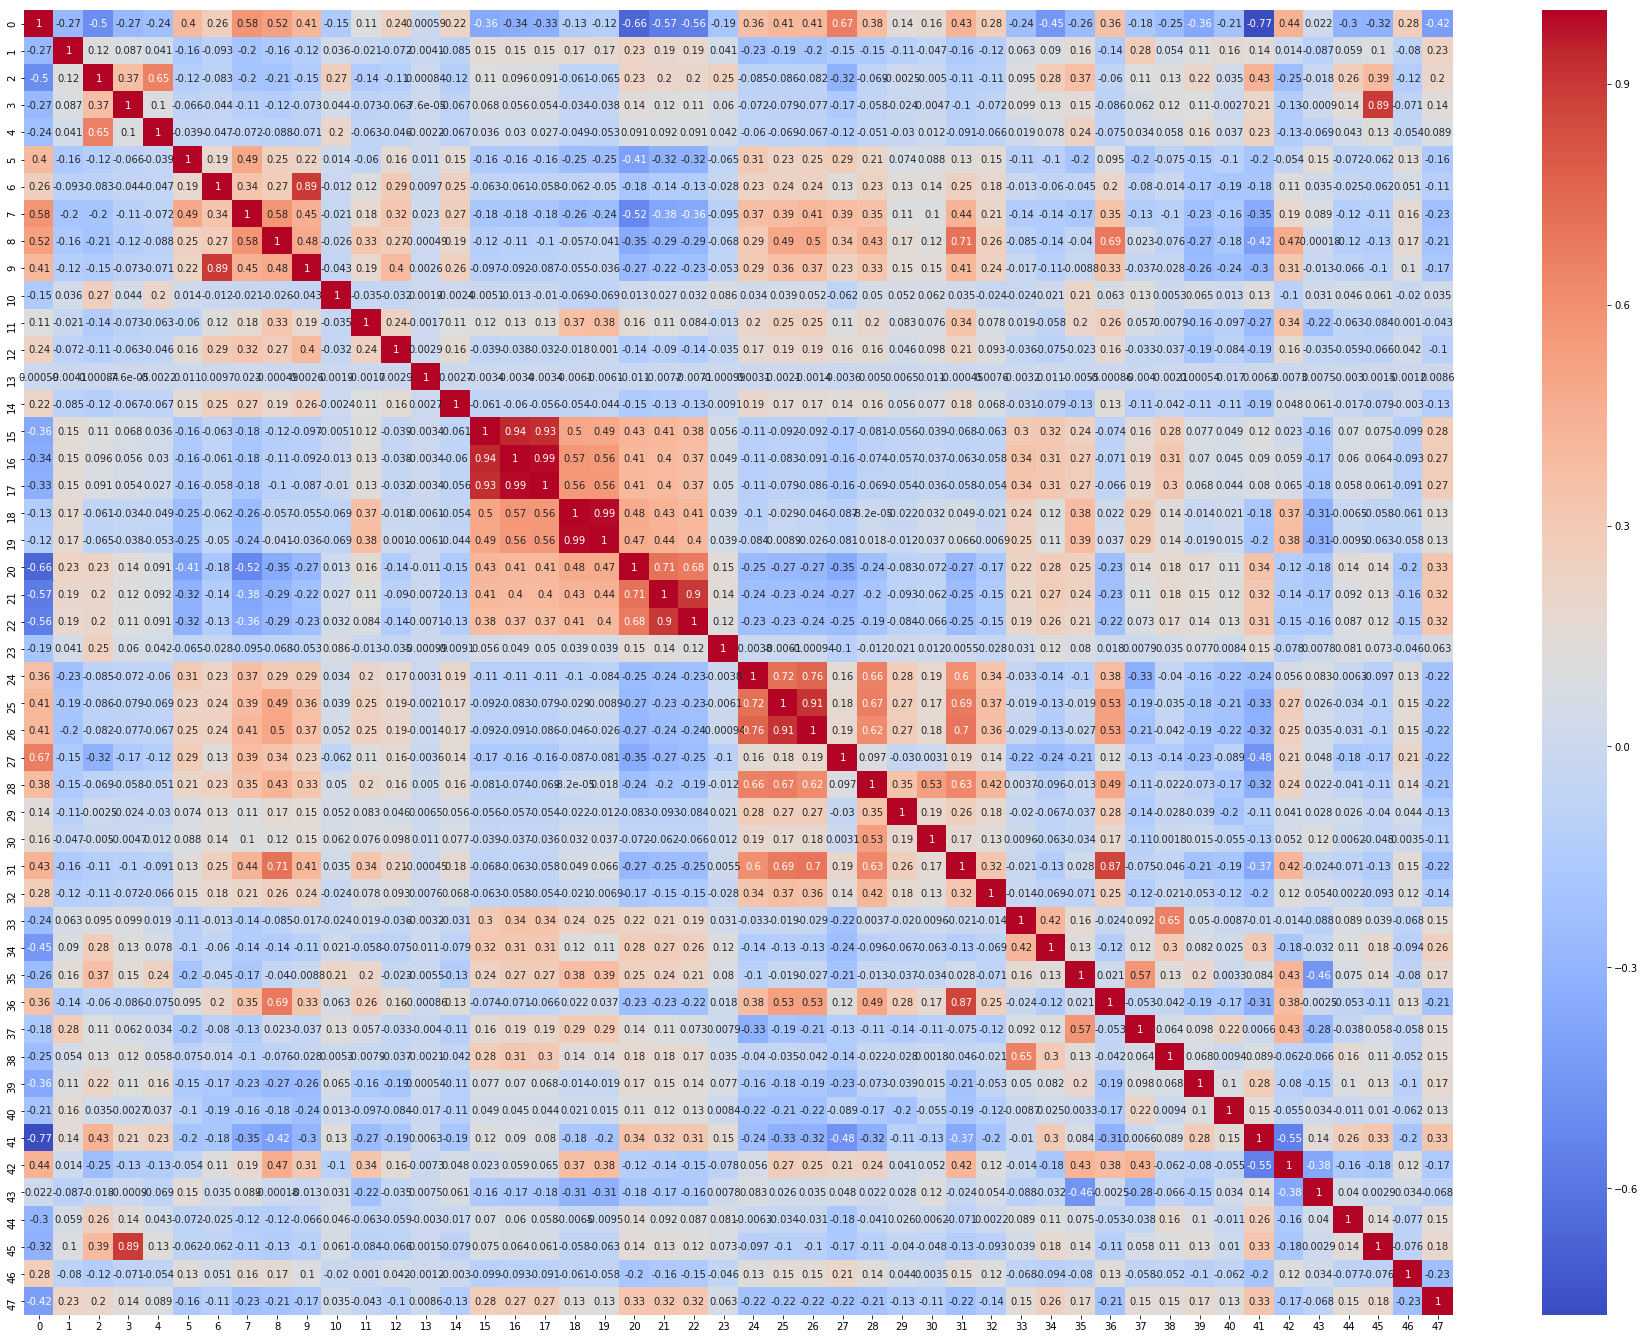

In [15]:
plt.subplots(figsize=(32,24))
sns.heatmap(correlation_inTrainData, cmap='coolwarm', annot=True)

In [35]:
pd.DataFrame(X_train).head(20)

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,1719.0,1.5626,0.000,0.000,0.000,801.0,2047.0,2047.0,17243.0,2047.0,...,0.0,0.0,NaN,NaN,0.66667,1.0,0.82299,NaN,NaN,0.0
1,1636.0,0.2824,3.010,0.000,0.000,24.0,24.0,24.0,297.0,24.0,...,2.0,0.0,NaN,NaN,0.33333,1.0,1.00000,NaN,0.0,0.0
2,1914.0,0.0164,0.000,0.000,0.000,11873.0,18549.0,18549.0,398605.0,50110.0,...,5.0,0.0,6.053,NaN,0.00000,16.0,0.97827,0.0,0.0,0.0
3,1776.0,0.0801,0.000,0.000,0.000,1839.0,2881.0,1839.0,7779.0,8624.0,...,3.0,0.0,NaN,NaN,0.16667,6.0,0.99563,0.0,0.0,1.0
4,1755.0,0.0000,1.615,0.846,0.000,2588.0,8542.0,2588.0,10158.0,12432.0,...,2.0,0.0,123.156,44.853,0.04762,5.0,0.55397,0.0,0.0,1.0
5,1743.0,1.3332,0.000,0.000,0.000,574.0,1949.0,1253.0,10524.0,5576.0,...,4.0,0.0,NaN,NaN,0.37500,7.0,0.56658,NaN,0.0,1.0
6,1857.0,0.0599,0.000,0.000,0.000,814.0,10625.0,8919.0,11397.0,21204.0,...,4.0,0.0,NaN,65.001,0.00000,3.0,0.72702,NaN,0.0,1.0
7,1924.0,0.0000,0.000,0.000,0.000,7569.0,23289.0,23289.0,157965.0,95695.0,...,2.0,0.0,NaN,NaN,0.00000,12.0,0.85696,NaN,0.0,1.0
8,1781.0,2.7791,0.333,0.000,0.000,183.0,5288.0,4105.0,14370.0,20246.0,...,10.0,0.0,101.842,NaN,0.07407,17.0,0.26869,NaN,0.0,0.0
9,1664.0,0.4389,43.341,0.000,39.077,NaN,10398.0,NaN,NaN,10415.0,...,5.0,0.0,NaN,65.517,0.88889,3.0,0.98595,NaN,0.0,1.0


<h3> Now I am gonna impute the data and also apply scaling </h3>

In [8]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values='NaN', strategy='median', axis = 0)
imputer = imputer.fit(X)
X = imputer.transform(X)

imputer2 = Imputer(missing_values='NaN', strategy='median', axis = 0)
imputer2 = imputer2.fit(X_leaderboard)
X_leaderboard = imputer2.transform(X_leaderboard)

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

sc2 = StandardScaler()
X_leaderboard = sc2.fit_transform(X_leaderboard)

In [11]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

/home/aniket/.conda/envs/fastai/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


**So basically I am gonna remove mvar11, mvar 30, mvar31, mvar35, mvar40, mvar41, mvar45**
**Also already mvar14, mvar24 were to be removed**

In [12]:
X_train = X_train[:, [0,1,2,3,4,5,6,7,8,9,11,12,14,15,16,17,18,19,20,21,22,24,25,26,27,28,31,32,33,35,36,37,38,41,42,43,45,46]]
X_leaderboard = X_leaderboard[:, [0,1,2,3,4,5,6,7,8,9,11,12,14,15,16,17,18,19,20,21,22,24,25,26,27,28,31,32,33,35,36,37,38,41,42,43,45,46]]
X_test = X_test[:, [0,1,2,3,4,5,6,7,8,9,11,12,14,15,16,17,18,19,20,21,22,24,25,26,27,28,31,32,33,35,36,37,38,41,42,43,45,46]]

In [13]:
from sklearn import decomposition
svd = decomposition.TruncatedSVD(n_components=1, algorithm='arpack')
svd.fit(X_train[:, [6,9]])

svd_lBoard = decomposition.TruncatedSVD(n_components=1, algorithm='arpack')
svd_lBoard.fit(X_leaderboard[:, [6,9]])

X_train[:, [6,9]] = svd.transform(X_train[:, [6,9]])
X_test[:, [6,9]] = svd.transform(X_test[:, [6,9]])
X_leaderboard[:, [6,9]] = svd_lBoard.transform(X_leaderboard[:, [6,9]])

X_train = X_train[:, [0,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37]]
X_test = X_test[:, [0,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37]]
X_leaderboard = X_leaderboard[:, [0,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37]]

In [14]:
svd2 = decomposition.TruncatedSVD(n_components=1, algorithm='arpack')
svd2.fit(X_train[:, [12, 13, 14]])

svd2_lBoard = decomposition.TruncatedSVD(n_components=1, algorithm='arpack')
svd2_lBoard.fit(X_leaderboard[:, [12, 13, 14]])

X_train[:, [12, 13, 14]] = svd2.transform(X_train[:, [12, 13, 14]])
X_test[:, [12, 13, 14]] = svd2.transform(X_test[:, [12, 13, 14]])
X_leaderboard[:, [12, 13, 14]] = svd2_lBoard.transform(X_leaderboard[:, [12, 13, 14]])

X_train = X_train[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36]]
X_test = X_test[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36]]
X_leaderboard = X_leaderboard[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36]]

In [15]:
svd3 = decomposition.TruncatedSVD(n_components=1, algorithm='arpack')
svd3.fit(X_train[:, [13, 14]])

svd3_lBoard = decomposition.TruncatedSVD(n_components=1, algorithm='arpack')
svd3_lBoard.fit(X_leaderboard[:, [13, 14]])

X_train[:, [13, 14]] = svd3.transform(X_train[:, [13, 14]])
X_test[:, [13, 14]] = svd3.transform(X_test[:, [13, 14]])
X_leaderboard[:, [13, 14]] = svd3_lBoard.transform(X_leaderboard[:, [13, 14]])

X_train = X_train[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34]]
X_test = X_test[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34]]
X_leaderboard = X_leaderboard[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34]]

In [16]:
svd4 = decomposition.TruncatedSVD(n_components=1, algorithm='arpack')
svd4.fit(X_train[:, [15, 16]])

svd4_lBoard = decomposition.TruncatedSVD(n_components=1, algorithm='arpack')
svd4_lBoard.fit(X_leaderboard[:, [15, 16]])

X_train[:, [15, 16]] = svd4.transform(X_train[:, [15, 16]])
X_test[:, [15, 16]] = svd4.transform(X_test[:, [15, 16]])
X_leaderboard[:, [15, 16]] = svd4_lBoard.transform(X_leaderboard[:, [15, 16]])

X_train = X_train[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33]]
X_test = X_test[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33]]
X_leaderboard = X_leaderboard[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33]]

In [17]:
svd5 = decomposition.TruncatedSVD(n_components=1, algorithm='arpack')
svd5.fit(X_train[:, [16, 17, 18]])

svd5_lBoard = decomposition.TruncatedSVD(n_components=1, algorithm='arpack')
svd5_lBoard.fit(X_leaderboard[:, [16, 17, 18]])

X_train[:, [16, 17, 18]] = svd5.transform(X_train[:, [16, 17, 18]])
X_test[:, [16, 17, 18]] = svd5.transform(X_test[:, [16, 17, 18]])
X_leaderboard[:, [16, 17, 18]] = svd5_lBoard.transform(X_leaderboard[:, [16, 17, 18]])

X_train = X_train[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,19,20,21,22,23,24,25,26,27,28,29,30,31,32]]
X_test = X_test[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,19,20,21,22,23,24,25,26,27,28,29,30,31,32]]
X_leaderboard = X_leaderboard[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,19,20,21,22,23,24,25,26,27,28,29,30,31,32]]

In [18]:
X_train.shape

(60000, 31)

<h3> In this I will be using XGBRegressor </h3>

In [23]:
import xgboost

In [24]:
for i in np.arange(5,10,1):
    classifier = xgboost.XGBRegressor(n_estimators = 100, max_depth=i, learning_rate=0.1)
    classifier.fit(X_train, y_train)
    y_pred_test = classifier.predict(X_test)
    j = 0
    for i in y_pred_test:
        if i > 0.5:
            y_pred_test[j] = 1
        else:
            y_pred_test[j] = 0
        j = j + 1

    print(mean_squared_error(y_test, y_pred_test))

0.1911
0.1907
0.1904
0.19045
0.19415


In [25]:
classifier = xgboost.XGBRegressor(max_depth=7)
classifier.fit(X_train, y_train)
y_pred_test = classifier.predict(X_test)

In [26]:
j = 0
for i in y_pred_test:
    if i > 0.5:
        y_pred_test[j] = 1
    else:
        y_pred_test[j] = 0
    j = j + 1

mean_squared_error(y_test, y_pred_test)

0.1904

<h3> Now I will be using ANN on this preprocessed dataset </h3>

In [19]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.layers import Dropout
from keras.constraints import maxnorm

Using TensorFlow backend.


In [82]:
X_train.shape

(60000, 31)

In [83]:
classifier = Sequential()
#classifier.add(Dropout(rate=0.2, input_shape=(38,)))
classifier.add(Dense(output_dim=15, init='uniform', activation='relu', input_dim=31))
#classifier.add(Dropout(rate = 0.2, input_shape = (23,)))
classifier.add(Dense(output_dim=7, init='uniform', activation='relu'))
classifier.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))

classifier.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

/home/aniket/.conda/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=31, units=15, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/home/aniket/.conda/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=7, kernel_initializer="uniform")`
  """
/home/aniket/.conda/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


In [84]:
classifier.fit(X_train, y_train, nb_epoch = 50)

/home/aniket/.conda/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/50
60000/60000 [==============================] - 2s 39us/step - loss: 0.4402 - acc: 0.7918
Epoch 2/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.4210 - acc: 0.8003
Epoch 3/50
60000/60000 [==============================] - 2s 31us/step - loss: 0.4194 - acc: 0.8005
Epoch 4/50
60000/60000 [==============================] - 2s 32us/step - loss: 0.4189 - acc: 0.8008
Epoch 5/50
60000/60000 [==============================] - 2s 31us/step - loss: 0.4182 - acc: 0.8017
Epoch 6/50
60000/60000 [==============================] - 2s 31us/step - loss: 0.4177 - acc: 0.8023
Epoch 7/50
60000/60000 [==============================] - 2s 32us/step - loss: 0.4173 - acc: 0.8024
Epoch 8/50
60000/60000 [==============================] - 2s 32us/step - loss: 0.4167 - acc: 0.8027
Epoch 9/50
60000/60000 [==============================] - 2s 37us/step - loss: 0.4165 - acc: 0.8026
Epoch 10/50
60000/60000 [==============================] - 2s 38us/step - loss: 0.4161 - acc: 0.8035

In [85]:
y_pred_test = classifier.predict(X_test)
j = 0
for i in y_pred_test:
    if i > 0.5:
        y_pred_test[j] = 1
    else:
        y_pred_test[j] = 0
    j = j + 1

mean_squared_error(y_test, y_pred_test)

0.19685

<h3> I will be using Random Forest Regressor </h3>

In [39]:
from sklearn.ensemble import RandomForestRegressor

In [40]:
classifier = RandomForestRegressor(n_estimators=100, max_depth= 7, random_state=0)

In [41]:
classifier.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [42]:
y_pred_test = classifier.predict(X_test)
j = 0
for i in y_pred_test:
    if i > 0.5:
        y_pred_test[j] = 1
    else:
        y_pred_test[j] = 0
    j = j + 1

mean_squared_error(y_test, y_pred_test)

0.1987

In [ ]:
clas

<h1> Now i am going to start working on the leaderboard dataset </h1>

In [86]:
y_pred_leaderboard = classifier.predict(X_leaderboard)

In [87]:
y_pred_leaderboard = y_pred_leaderboard.reshape(y_pred_leaderboard.shape[0], 1)
y_pred_leaderboard.shape

(25000, 1)

In [88]:
lead = pd.read_csv('Leaderboard_dataset.csv')
final_array = lead.iloc[:, 0].values

/home/aniket/.conda/envs/fastai/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [89]:
final_array = final_array.reshape(final_array.shape[0], 1)

In [90]:
final_array.shape

(25000, 1)

In [91]:
final_array = np.append(final_array, y_pred_leaderboard, axis=1)

In [92]:
df = pd.DataFrame()
df = pd.DataFrame(final_array)

In [34]:
df

,0,1
0,350053.0,-0.001919
1,350054.0,0.064797
2,350055.0,0.097709
3,350056.0,0.570723
4,350057.0,0.079648
5,350058.0,-0.007917
6,350059.0,0.045334
7,350060.0,-0.000902
8,350061.0,0.004556
9,350062.0,0.287521


In [93]:
df2 = df.sort_values([1])

In [36]:
df2

,0,1
13921,363974.0,-0.140641
1721,351774.0,-0.106220
7205,357258.0,-0.089152
4544,354597.0,-0.083437
2635,352688.0,-0.082399
8634,358687.0,-0.064401
23262,373315.0,-0.061732
5049,355102.0,-0.058226
6878,356931.0,-0.057109
12689,362742.0,-0.052781


In [94]:
j = 0
for i in df2.iloc[:, 1]:
    if i >0.4:
        df2.iloc[j, 1] = 1
    else:
        df2.iloc[j, 1] = 0
    j = j+1

In [95]:
df2.to_csv('Be_Professional_IITRoorkee_47.csv', index = False)